# Statistical Hypothesis Testing to Improve Machine Learning Algorithm in South Jakarta House Price Prediction
## Author: Edycakra Immanuel Sinaga


In [59]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

In [76]:
# this is the previous machine learning dataset (clean)
df = pd.read_csv('../data/final/olx_house_stratified_c_ENG.csv', encoding='latin-1')

In [77]:
df.head()


,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
0,5,4,2,107,167,SHM,Cilandak,2000000000
1,3,2,2,95,105,SHM,Cilandak,1800000000
2,3,2,2,83,75,SHM,Cilandak,885000000
3,4,3,2,86,120,SHM,Cilandak,950000000
4,4,4,2,110,140,SHM,Cilandak,2640000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NBED    147 non-null    int64 
 1   NBATH   147 non-null    int64 
 2   NFLOOR  147 non-null    int64 
 3   BLDAR   147 non-null    int64 
 4   LNDAR   147 non-null    int64 
 5   CERT    147 non-null    object
 6   LOC     147 non-null    object
 7   Price   147 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 9.3+ KB


## Data Descriptions:

South jakarta house price dataset (scraped from OLX, already cleaned and stratified) 

:Dataset Characteristics:
1. Number of Instances: 147
2. Number of Attributes: 7 numeric/categorical
3. Attribute Information (in order):
    - NBED    : amount of bedrooms 
    - NBATH   : amount of bathrooms 
    - NFLOOR  : amount of floors 
    - BLDAR   : size of the building area
    - LNDAR   : size of the land area
    - CERT    : type of certificates (SHM, HGB, Lainnya)
    - LOC     : location in south jakarta area
    - Price   : house price
4. Missing Attributes: None
5. Creator: Edycakra Immanuel Sinaga

# Checking Dataset

In [80]:
#check duplicates
df.duplicated().sum()

0

In [81]:
#check missing values
df.isnull().sum()

NBED      0
NBATH     0
NFLOOR    0
BLDAR     0
LNDAR     0
CERT      0
LOC       0
Price     0
dtype: int64

In [82]:
#check data types
df.dtypes

NBED       int64
NBATH      int64
NFLOOR     int64
BLDAR      int64
LNDAR      int64
CERT      object
LOC       object
Price      int64
dtype: object

Quick Summary:
- No duplicates found
- No missing values
- Data types are correct

# Exploratory Data Analysis (EDA)

## Analysis for Numerical Attributes

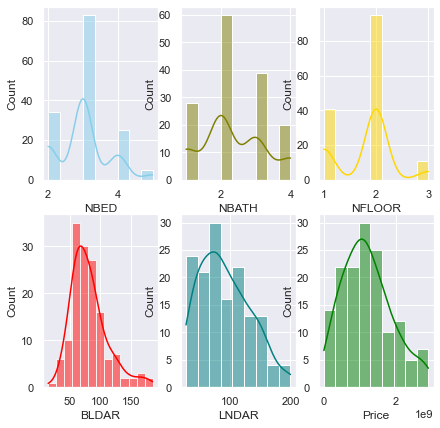

In [83]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=df, x="NBED", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="NBATH", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="NFLOOR", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="BLDAR", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df, x="LNDAR", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Price", kde=True, color="green", ax=axs[1, 2])

plt.show()

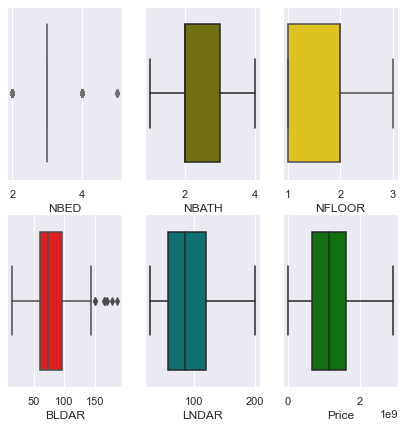

In [84]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.boxplot(data=df, x="NBED", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="NBATH", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="NFLOOR", color="gold", ax=axs[0, 2])
sns.boxplot(data=df, x="BLDAR", color="red", ax=axs[1, 0])
sns.boxplot(data=df, x="LNDAR", color="teal", ax=axs[1, 1])
sns.boxplot(data=df, x="Price", color="green", ax=axs[1, 2])

plt.show()

Overview/Description for Numerical Attributes

In [85]:
df.describe(include=[np.number])

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,Price
count,147.000000,147.000000,147.000000,147.000000,147.000000,1.470000e+02
mean,3.006803,2.346939,1.795918,81.727891,91.700680,1.203754e+09
std,0.735561,0.941094,0.560562,30.117250,42.157632,6.752500e+08
min,2.000000,1.000000,1.000000,15.000000,27.000000,5.000000e+06
25%,3.000000,2.000000,1.000000,60.000000,57.000000,6.750000e+08
50%,3.000000,2.000000,2.000000,73.000000,84.000000,1.150000e+09
75%,3.000000,3.000000,2.000000,95.500000,120.000000,1.600000e+09
max,5.000000,4.000000,3.000000,186.000000,200.000000,2.900000e+09


Correlation between Numerical Attributes and Price

In [86]:
df.corr()["Price"]

NBED      0.569534
NBATH     0.655447
NFLOOR    0.464080
BLDAR     0.541295
LNDAR     0.810647
Price     1.000000
Name: Price, dtype: float64

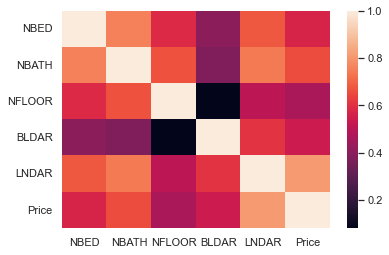

In [87]:
sns.heatmap(df.corr())

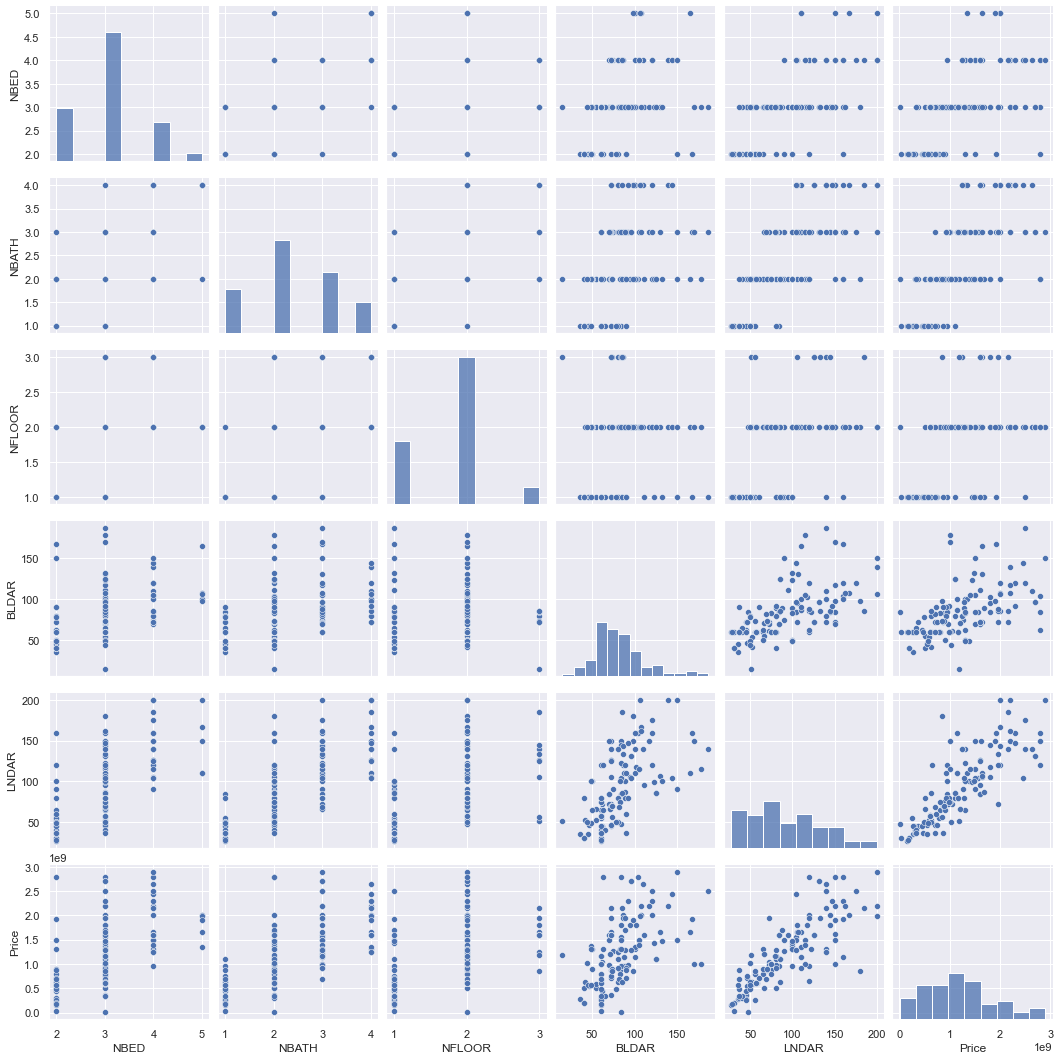

In [88]:
sns.pairplot(df)

## Analysis for Categorical Attributes

Median price of each type of certificate

Text(0, 0.5, 'Sertifikasi')

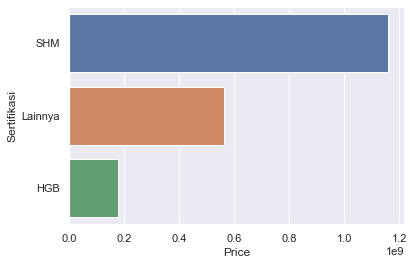

In [89]:
from numpy import median

sns.barplot(
    data=df, x="Price", y="CERT",estimator=median,
    # errorbar=("pi", 50), capsize=.4, errcolor=".5",
    # linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
    errorbar= None, order=df.groupby('CERT')["Price"].median().sort_values(ascending=False).index
)
plt.ylabel("Sertifikasi")


Text(0, 0.5, 'Lokasi di Jakarta Selatan')

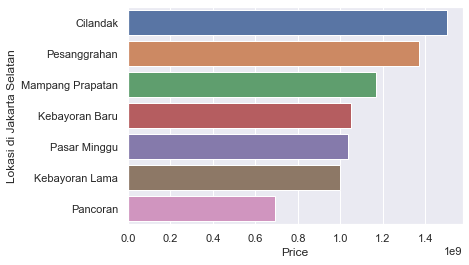

In [90]:
# by location
sns.barplot(
    data=df, x="Price", y="LOC",estimator=median,
    # errorbar=("pi", 50), capsize=.4, errcolor=".5",
    # linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
    errorbar= None, order=df.groupby('LOC')["Price"].median().sort_values(ascending=False).index
)
plt.ylabel("Lokasi di Jakarta Selatan")


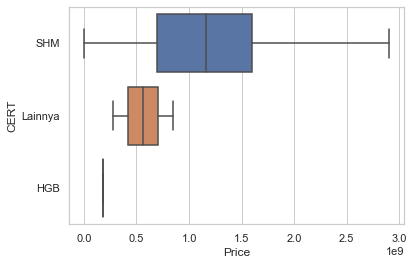

In [91]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="CERT", data=df, order=df.groupby('CERT')["Price"].median().sort_values(ascending=False).index)

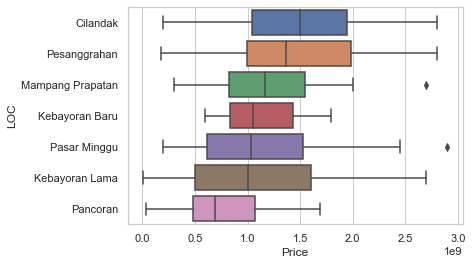

In [92]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="LOC", data=df, order=df.groupby('LOC')["Price"].median().sort_values(ascending=False).index)

## Hypothesis Testing

In [93]:
import statsmodels.api as sm


In [110]:
# Define the independent and dependent variables
X = df[['NBED', 'NBATH', 'NFLOOR', 'BLDAR', 'LNDAR']]
Y = df['Price']

# Add a constant to the independent variables
X_lm = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(Y, X_lm).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.92
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.68e-32
Time:                        05:55:08   Log-Likelihood:                -3114.6
No. Observations:                 147   AIC:                             6241.
Df Residuals:                     141   BIC:                             6259.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.932e+08   1.68e+08     -1.150      0.2

In [116]:
# Test the hypothesis that the coefficient for NBED is zero ===> for individual check
hypothesis = 'NBED = 0'
test_result = model.f_test(hypothesis)

# Print the test result
print(test_result.summary())

<F test: F=array([[0.39845376]]), p=0.5289108288329413, df_denom=141, df_num=1>


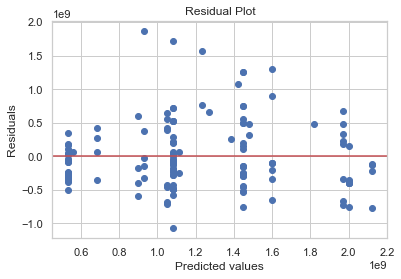

In [137]:
from sklearn.linear_model import LinearRegression

# Define the independent and dependent variables
X0 = df[['NBED', 'NBATH', 'NFLOOR']]
Y0 = df['Price']

# Fit the linear regression model
model0 = sm.OLS(Y0, sm.add_constant(X0)).fit()

# Make predictions
y_pred0 = model0.predict(sm.add_constant(X0))

# Calculate the residuals
residuals0 = Y0 - y_pred0

# Create the residual plot
plt.scatter(y_pred0, residuals0)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


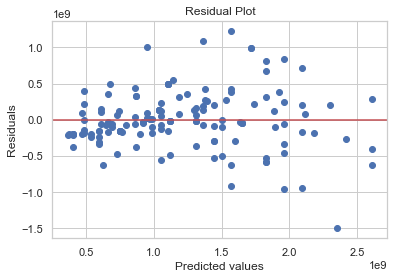

In [144]:
# For only LNDAR and BLDAR

# Define the independent and dependent variables
X1 = df[['LNDAR']]
Y1 = df['Price']

# Fit the linear regression model
model1 = sm.OLS(Y1, sm.add_constant(X1)).fit()

# Make predictions
y_pred1 = model1.predict(sm.add_constant(X1))

# Calculate the residuals
residuals0 = Y1 - y_pred1

# Create the residual plot
plt.scatter(y_pred1, residuals0)
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()





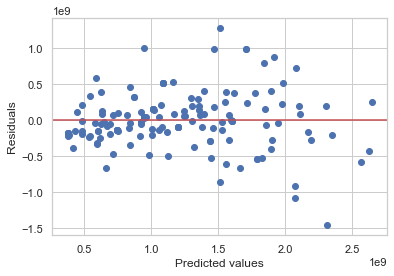

In [135]:
# # create the weights based on the inverse of the variance of the residuals from a simple OLS model
# residuals = model1.resid
# weights = 1/np.var(residuals)

# # perform the weighted regression
# weighted_model = sm.WLS(y_pred1, sm.add_constant(X1), weights=weights).fit()

# # # print the results
# # print(weighted_model.summary())

# # plot the residuals
# pred = weighted_model.predict(sm.add_constant(X1))
# resid = Y1 - pred
# plt.scatter(pred, resid)
# plt.axhline(y=0, color='r', linestyle='-')
# plt.xlabel('Predicted values')
# plt.ylabel('Residuals')
# plt.show()

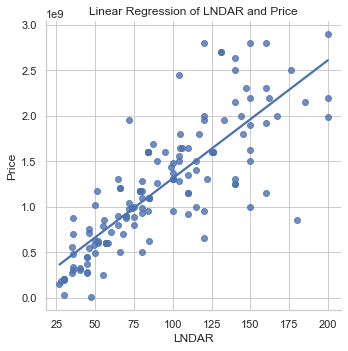

In [142]:
# Create a scatter plot with linear regression line
newdf = pd.DataFrame({'LNDAR':df['LNDAR'], 'Price':df['Price']})

sns.lmplot(x='LNDAR', y='Price', data=df, ci=None)

# Add labels and title
plt.xlabel('LNDAR')
plt.ylabel('Price')
plt.title('Linear Regression of LNDAR and Price')

# Show the plot
plt.show()

### Observation and Conclusion

Based on this OLS regression model, we can say that the land area is the most significant predictor of the price, and the building area is also a significant predictor of the price, but to a lesser extent. The number of bedrooms, number of bathrooms, and number of floors do not appear to have a significant impact on the price, based on this model.

The residual plot forming an approximately constant width band around the identity line with minor outlier on 2-3 results. 

We need to find more data to avoid heteroscedasticity in the residual plot, and also we need to gather more attributes because our 3 numerical attributes are deemed insignificant based on the hypothesis testing.